## Вариант 13

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/nexls/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['exp', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Требуется решить задачу Коши для приведённой системы дифференциальных уравнений первого порядка:

$\frac{dx}{dt} = F_{x}(x, y)$, $\frac{dy}{dt} = F_{y}(x, y)$

методом Рунге-Кутты второго либо четвёртого порядка точности. Начальные условия:

$x(t_{0}) = x_{0}$, $y(t_{0}) = y_{0}$

Строить решение нужно до преодоления параметром $t$ точки $t_{0}$.
Относительная точность должна быть не хуже $10^{-5}$

Система уравнений:

$x^\prime = 2e^t + 2x + y$

$y^\prime = x + 2y - 3e^{4t}$

Начальные условия:

$x(t_{0}) = 2$, $y(t_{0}) = 0$

$t_{0} = 0, t_{1} = -2$

In [68]:
#x' = 2*e^t + 2*x + y
#y' = x + 2*y - 3*e^(4*t)
def F1(t, x, y):
    return 2*np.exp(t) + 2*x + y

def F2(t, x, y):
    return x + 2*y - 3*np.exp(4*t)

Метод Рунге-Кутты четвертого порядка точности: 

In [69]:
def R_G(low, high, h):
    t = []
    xi = []
    yi = []
    xi.append(2)
    yi.append(3)
    t.append(low)
    low += h
    i = 1
    while round(low, 4) <= high:
        # X
        k1_x = h * F1(low, xi[i - 1], yi[i - 1])
        k2_x = h * F1(low + h / 2, xi[i - 1] + k1_x / 2, yi[i - 1] + k1_x / 2)
        k3_x = h * F1(low + h / 2, xi[i - 1] + k2_x / 2, yi[i - 1] + k2_x / 2)
        k4_x = h * F1(low + h, xi[i - 1] + k3_x, yi[i - 1] + k3_x)
        xi.append(xi[i - 1] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6)
        # Y
        k1_y = h * F2(low, xi[i - 1], yi[i - 1])
        k2_y = h * F2(low + h / 2, xi[i - 1] + k1_y / 2, yi[i - 1] + k1_y / 2)
        k3_y = h * F2(low + h / 2, xi[i - 1] + k2_y / 2, yi[i - 1] + k2_y / 2)
        k4_y = h * F2(low + h / 2, xi[i - 1] + k3_y, yi[i - 1] + k3_y)
        yi.append(yi[i - 1] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        
        t.append(low)
        low += h
        i += 1
    return t, xi, yi 

In [70]:
array_points = R_G(-2, 0, 0.1)

In [71]:
data = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T

Полученные точки прирешении системы ДУ:

In [72]:
data

,t,x,y
0,-2.000000e+00,2.000000,3.000000
1,-1.900000e+00,2.852882,3.932694
2,-1.800000e+00,4.017291,5.182270
3,-1.700000e+00,5.603238,6.858912
4,-1.600000e+00,7.759286,9.111304
5,-1.500000e+00,10.686030,12.140096
6,-1.400000e+00,14.654301,16.216070
7,-1.300000e+00,20.029727,21.704662
8,-1.200000e+00,27.305888,29.099055
9,-1.100000e+00,37.149060,39.064828


Построим график траеторий, порождённой этой последовательностью точек:

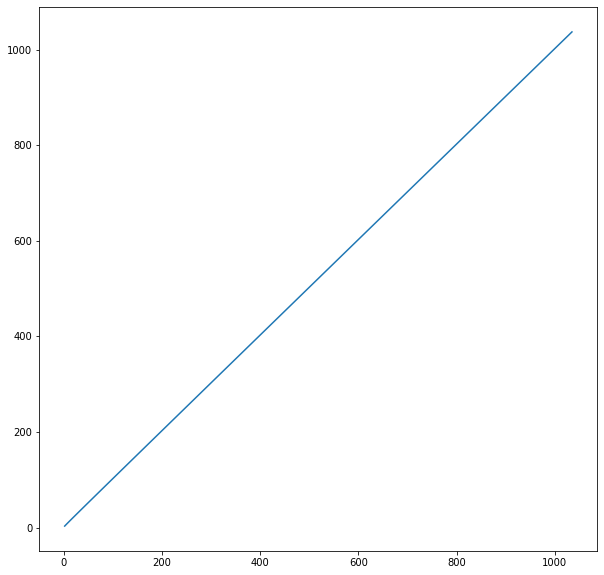

In [80]:
plt.figure(figsize(10, 10))
plt.plot(array_points[1], array_points[2])
plt.show()

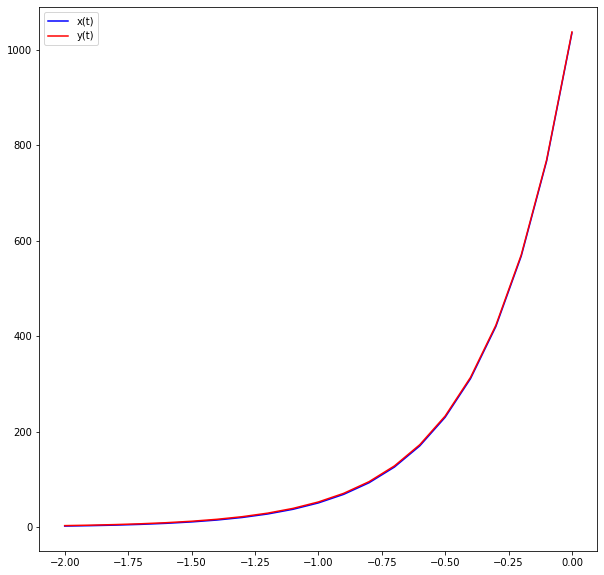

In [78]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')
plt.legend(prop={'size': 10})
plt.show()

Правило Рунге оценки погрешности:

In [74]:
array_points = R_G(-2, 0, 0.1)
array_exp = R_G(-2, 0, 0.1)

exp = []
for i, x in enumerate(array_exp[1]):
    if i % 2 == 0 or i == len(array_exp[1]) - 1:
        exp.append(x)
        print(i,x)
        
e = []
for i in range(len(exp)):
    e.append( abs(array_points[1][i] - exp[i]) / 3 )

0 2
2 4.017290592030302
4 7.7592855197384605
6 14.654300839437775
8 27.305887573698097
10 50.458605656550375
12 92.75717524359126
14 169.9505682311879
16 310.72746162528364
18 567.3430895963975
20 1034.969449865384


In [75]:
e[0]

0.0